In [ ]:
"""
A drive for animation.
"""

import os
import sys
# Add the function directory to the path
sys.path.append('/home/jiarong/research/postprocessing/functions/')
from visualization import subplot_animation
from IPython.display import HTML

# Specify the common directory, a set of paths where each case is,
# and a set of tags used for animation titles.


os.chdir('/home/jiarong/research/windwave')

path = ['./linear_m5B0Ustar0.5ak0.01Bo3.45Re31000.LEVEL10',
        './linear_m5B0Ustar0.5ak0.02Bo3.45Re31000.LEVEL10',
        './linear_m5B0Ustar0.5ak0.05Bo3.45Re31000.LEVEL10',
        './linear_m5B0Ustar0.5ak0.1Bo3.45Re31000.LEVEL10',
        './linear_m5B0Ustar0.5ak0.15Bo3.45Re31000.LEVEL10',
        './linear_m5B0Ustar0.5ak0.2Bo3.45Re31000.LEVEL10']
title = ['ak = 0.01','ak = 0.02','ak = 0.05','ak = 0.1','ak = 0.15','ak = 0.2']
subpath = '/test_animation/movie'

# Depending on running on web-based jupyter notebook or the script directly, 
# save or display the animation
    
anim = subplot_animation(path, title, [3, 2], subpath, frame_number = 20) 
# anim.save('./name.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())

Note that the function below has no control on the actual color of the coutour that it reads in through imread.
It just generate a colorbar that matches what is in the animation.
To fine tune the color of the animation, do it through for example ./windwave/common/norun.c and set a different range in the square function and rerun ./windwave/common/cross.py.

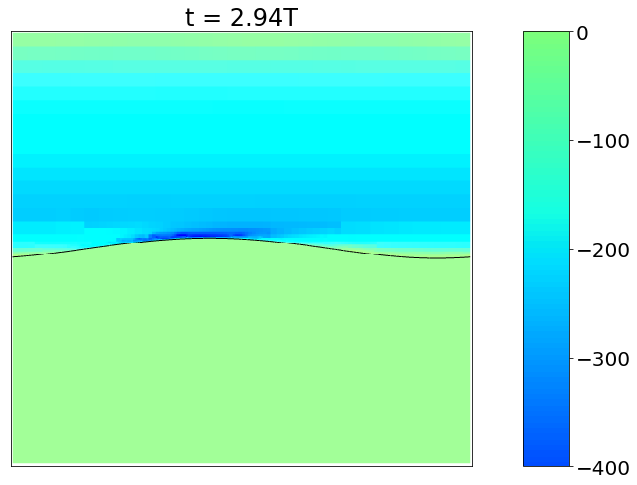

In [17]:
# How to speed up matplotlib
# https://stackoverflow.com/questions/8955869/why-is-plotting-with-matplotlib-so-slow
from matplotlib import animation
from visualization import contour
from IPython.display import HTML
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate    
    fig = plt.figure(figsize = [10, 8])
    gs = gridspec.GridSpec(1, 2, width_ratios=[10, 1])
    ax = [plt.subplot(g) for g in gs]

    # The tick numbers and also the upper and lower bounds of the data
    parameterToColorBy = np.linspace(-400, 0, 5, dtype=float)

    def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
        if n == -1:
            n = cmap.N
        new_cmap = mcolors.LinearSegmentedColormap.from_list(
             'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
             cmap(np.linspace(minval, maxval, n)))
        return new_cmap

    # The range of the actual colormap we want to use, and which colormap
    minColor = 0.2
    maxColor = 0.5
    jet_t = truncate_colormap(plt.get_cmap("jet"), minColor, maxColor)
    colors = [jet_t(i) for i in np.linspace(0, 1, parameterToColorBy.shape[0])]
    norm = mpl.colors.Normalize(parameterToColorBy[0],
                                parameterToColorBy[-1])
    # Plot the colorbar in ax[1] (righthand side)
    cb = mpl.colorbar.ColorbarBase(ax[1],
                                   cmap=jet_t,
                                   norm=norm,
                                   ticks=parameterToColorBy,
                                   orientation='vertical')
    # Adjust the tick size
    cb.ax.tick_params(labelsize=20)

    # animation function.  This is called sequentially
    def animate(i):
        t = i
        imgplot = animate_function(i, ax[0])
        return imgplot,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = True)  
    return anim

# Define the function called at every animation time to read in images
def plot_func(i, ax):
    t = i/32
    img = mpimg.imread('omega%g' % t)
    image = ax.imshow(img, aspect='equal')
    ax.set_aspect('auto')
    ax.set_xlim([62, 538]) # Visual range
    ax.set_ylim([538, 62])
    ax.set_title('t = %1.2fT' %t, fontsize = 24)
    ax.get_xaxis().set_visible(False) # Hide the axis
    ax.get_yaxis().set_visible(False)
    return image

os.chdir('/home/jiarong/research/projects/windwave/linear_m5B0Ustar1.2ak0.05Bo0.53Re5000.LEVEL10')
anim = plot_animation(plot_func, frame_number = 95, interval_time = 100) # Specify frame number
HTML(anim.to_html5_video())

In [ ]:
'''
Another example with the camera moving for potential future use.
'''

#Uncomment the next two lines if you want to save the animation
#import matplotlib
#matplotlib.use("Agg")

import numpy
from matplotlib.pylab import *
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.animation as animation

# Sent for figure
font = {'size'   : 9}
matplotlib.rc('font', **font)

# Setup figure and subplots
f0 = figure(num = 0, figsize = (12, 8))#, dpi = 100)
f0.suptitle("Oscillation decay", fontsize=12)
ax01 = subplot2grid((2, 2), (0, 0))
ax02 = subplot2grid((2, 2), (0, 1))
ax03 = subplot2grid((2, 2), (1, 0), colspan=2, rowspan=1)
ax04 = ax03.twinx()
#tight_layout()

# Set titles of subplots
ax01.set_title('Position vs Time')
ax02.set_title('Velocity vs Time')
ax03.set_title('Position and Velocity vs Time')

# set y-limits
ax01.set_ylim(0,2)
ax02.set_ylim(-6,6)
ax03.set_ylim(-0,5)
ax04.set_ylim(-10,10)

# sex x-limits
ax01.set_xlim(0,5.0)
ax02.set_xlim(0,5.0)
ax03.set_xlim(0,5.0)
ax04.set_xlim(0,5.0)

# Turn on grids
ax01.grid(True)
ax02.grid(True)
ax03.grid(True)

# set label names
ax01.set_xlabel("x")
ax01.set_ylabel("py")
ax02.set_xlabel("t")
ax02.set_ylabel("vy")
ax03.set_xlabel("t")
ax03.set_ylabel("py")
ax04.set_ylabel("vy")

# Data Placeholders
yp1=zeros(0)
yv1=zeros(0)
yp2=zeros(0)
yv2=zeros(0)
t=zeros(0)

# set plots
p011, = ax01.plot(t,yp1,'b-', label="yp1")
p012, = ax01.plot(t,yp2,'g-', label="yp2")

p021, = ax02.plot(t,yv1,'b-', label="yv1")
p022, = ax02.plot(t,yv2,'g-', label="yv2")

p031, = ax03.plot(t,yp1,'b-', label="yp1")
p032, = ax04.plot(t,yv1,'g-', label="yv1")

# set lagends
ax01.legend([p011,p012], [p011.get_label(),p012.get_label()])
ax02.legend([p021,p022], [p021.get_label(),p022.get_label()])
ax03.legend([p031,p032], [p031.get_label(),p032.get_label()])

# Data Update
xmin = 0.0
xmax = 5.0
x = 0.0

def updateData(self):
	global x
	global yp1
	global yv1
	global yp2
	global yv2
	global t

	tmpp1 = 1 + exp(-x) *sin(2 * pi * x)
	tmpv1 = - exp(-x) * sin(2 * pi * x) + exp(-x) * cos(2 * pi * x) * 2 * pi
	yp1=append(yp1,tmpp1)
	yv1=append(yv1,tmpv1)
	yp2=append(yp2,0.5*tmpp1)
	yv2=append(yv2,0.5*tmpv1)
	t=append(t,x)

	x += 0.05

	p011.set_data(t,yp1)
	p012.set_data(t,yp2)

	p021.set_data(t,yv1)
	p022.set_data(t,yv2)

	p031.set_data(t,yp1)
	p032.set_data(t,yv1)

	if x >= xmax-1.00:
		p011.axes.set_xlim(x-xmax+1.0,x+1.0)
		p021.axes.set_xlim(x-xmax+1.0,x+1.0)
		p031.axes.set_xlim(x-xmax+1.0,x+1.0)
		p032.axes.set_xlim(x-xmax+1.0,x+1.0)

	return p011, p012, p021, p022, p031, p032

# interval: draw new frame every 'interval' ms
# frames: number of frames to draw
simulation = animation.FuncAnimation(f0, updateData, blit=False, frames=200, interval=20, repeat=False)

# Uncomment the next line if you want to save the animation
#simulation.save(filename='sim.mp4',fps=30,dpi=300)

plt.show()